<a href="https://colab.research.google.com/github/Neural-Energies/Portfolio/blob/main/Credit_Risk_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kaggle Notebook Info**


In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'credit-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5201081%2F8676845%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240701%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240701T153205Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D42559ba887c6f2e308966338e96de6963670f80b2b65832fe56634a1a9de5b3c63fe110023978915032862c1372ef1fae9287a6b7af9acce01aedc9095717662f8b9c55c1d03973b0b7162f8993d9d13ea2ce1de4ccdcd1dadc312e1fe4bc5ff965d60e73b4600ac2e065b6a19561ece2ddefbe9e399075fb563264e7b43f99e609fab1a1ab17d760bc488428d33c83754884e8686b884ac542e87c05456781a95d218db20a96fb7f41fa04a03195a1bc93fb445514aeb390eaf61c3589dd5f72061ab90313867da1f9d1e03af3241f189df38a7d71b3f88a0972303d46991d25552b217a16842eca22cd5323fada711df591faa61ff8b8c98eedb6da1b61cd0'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 7453 bytes downloaded
Downloaded and uncompressed: credit-data
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-data/Credit_Data.csv


# **Data Preparation**

This dataset contains information related to individuals' financial and demographic characteristics, which can be useful for various analyses, such as credit scoring, customer segmentation, or financial behavior studies. The dataset includes the following columns:

**ID:** A unique identifier for each individual.

**Income:** The individual's annual income (in thousands of dollars).

**Limit:** The credit limit assigned to the individual's credit card account.

**Rating:** A credit rating score for the individual.

**Cards:** The number of credit cards the individual possesses.

**Age:** The age of the individual.

**Education:** The number of years of education completed by the individual.

**Gender:** The gender of the individual (Male/Female).

**Student:** Whether the individual is a student (Yes/No).

**Married:** The marital status of the individual (Yes/No).

**Ethnicity:** The ethnic background of the individual.

**Balance:** The current balance on the individual's credit card account.


---


**Key Insights**

**Income and Credit Limit:** Examining the relationship between income levels and the assigned credit limits.

**Credit Rating:** Understanding how various factors such as income, number of cards, and education influence credit ratings.

**Demographic Analysis:** Analyzing differences in financial behavior and credit characteristics across different genders, marital statuses, and ethnic backgrounds.

**Age and Financial Behavior:** Investigating how financial behavior, such as balance and credit card usage, changes with age.

**Potential Applications**
**Credit Risk Modeling:** Develop models to predict credit risk based on demographic and financial data.

**Customer Segmentation:** Identify different customer segments to tailor financial products and marketing strategies.

**Financial Education Programs:** Design targeted financial education programs for specific demographics to improve financial literacy and behavior.

This dataset provides a comprehensive view of various factors that can influence an individual's financial behavior and creditworthiness, making it a valuable resource for financial analysis and modeling.

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


# **Load Dataset**

In [ ]:
data = pd.read_csv('/kaggle/input/credit-data/Credit_Data.csv')
data.head()


ID   Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   1   14.891   3606     283      2   34         11    Male      No     Yes   
1   2  106.025   6645     483      3   82         15  Female     Yes     Yes   
2   3  104.593   7075     514      4   71         11    Male      No      No   
3   4  148.924   9504     681      3   36         11  Female      No      No   
4   5   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331

**Drop Unnecessary Column**

In [ ]:
data.drop('ID', axis=1, inplace=True)


# **Exploroatory Data Analysis (EDA)**

In [ ]:
def get_summary(df):
    df_desc = pd.DataFrame(df.describe(include='all').transpose())
    df_summary = pd.DataFrame({
        'dtype': df.dtypes,
        '#missing': df.isnull().sum().values,
        '#duplicates': df.duplicated().sum(),
        '#unique': df.nunique().values,
        'min': df_desc['min'].values,
        'max': df_desc['max'].values,
        'avg': df_desc['mean'].values,
        'std dev': df_desc['std'].values,
    })
    return df_summary

get_summary(data).style.background_gradient()


**Summary Statistics**

In [ ]:
# Summary statistics for numerical variables
print(data.describe())

# Summary statistics for categorical variables
print(data.describe(include=['O']))


           Income         Limit      Rating       Cards         Age  \
count  400.000000    400.000000  400.000000  400.000000  400.000000   
mean    45.218885   4735.600000  354.940000    2.957500   55.667500   
std     35.244273   2308.198848  154.724143    1.371275   17.249807   
min     10.354000    855.000000   93.000000    1.000000   23.000000   
25%     21.007250   3088.000000  247.250000    2.000000   41.750000   
50%     33.115500   4622.500000  344.000000    3.000000   56.000000   
75%     57.470750   5872.750000  437.250000    4.000000   70.000000   
max    186.634000  13913.000000  982.000000    9.000000   98.000000   

        Education      Balance  
count  400.000000   400.000000  
mean    13.450000   520.015000  
std      3.125207   459.758877  
min      5.000000     0.000000  
25%     11.000000    68.750000  
50%     14.000000   459.500000  
75%     16.000000   863.000000  
max     20.000000  1999.000000  
        Gender Student Married  Ethnicity
count      400     40

**Visual Analysis**

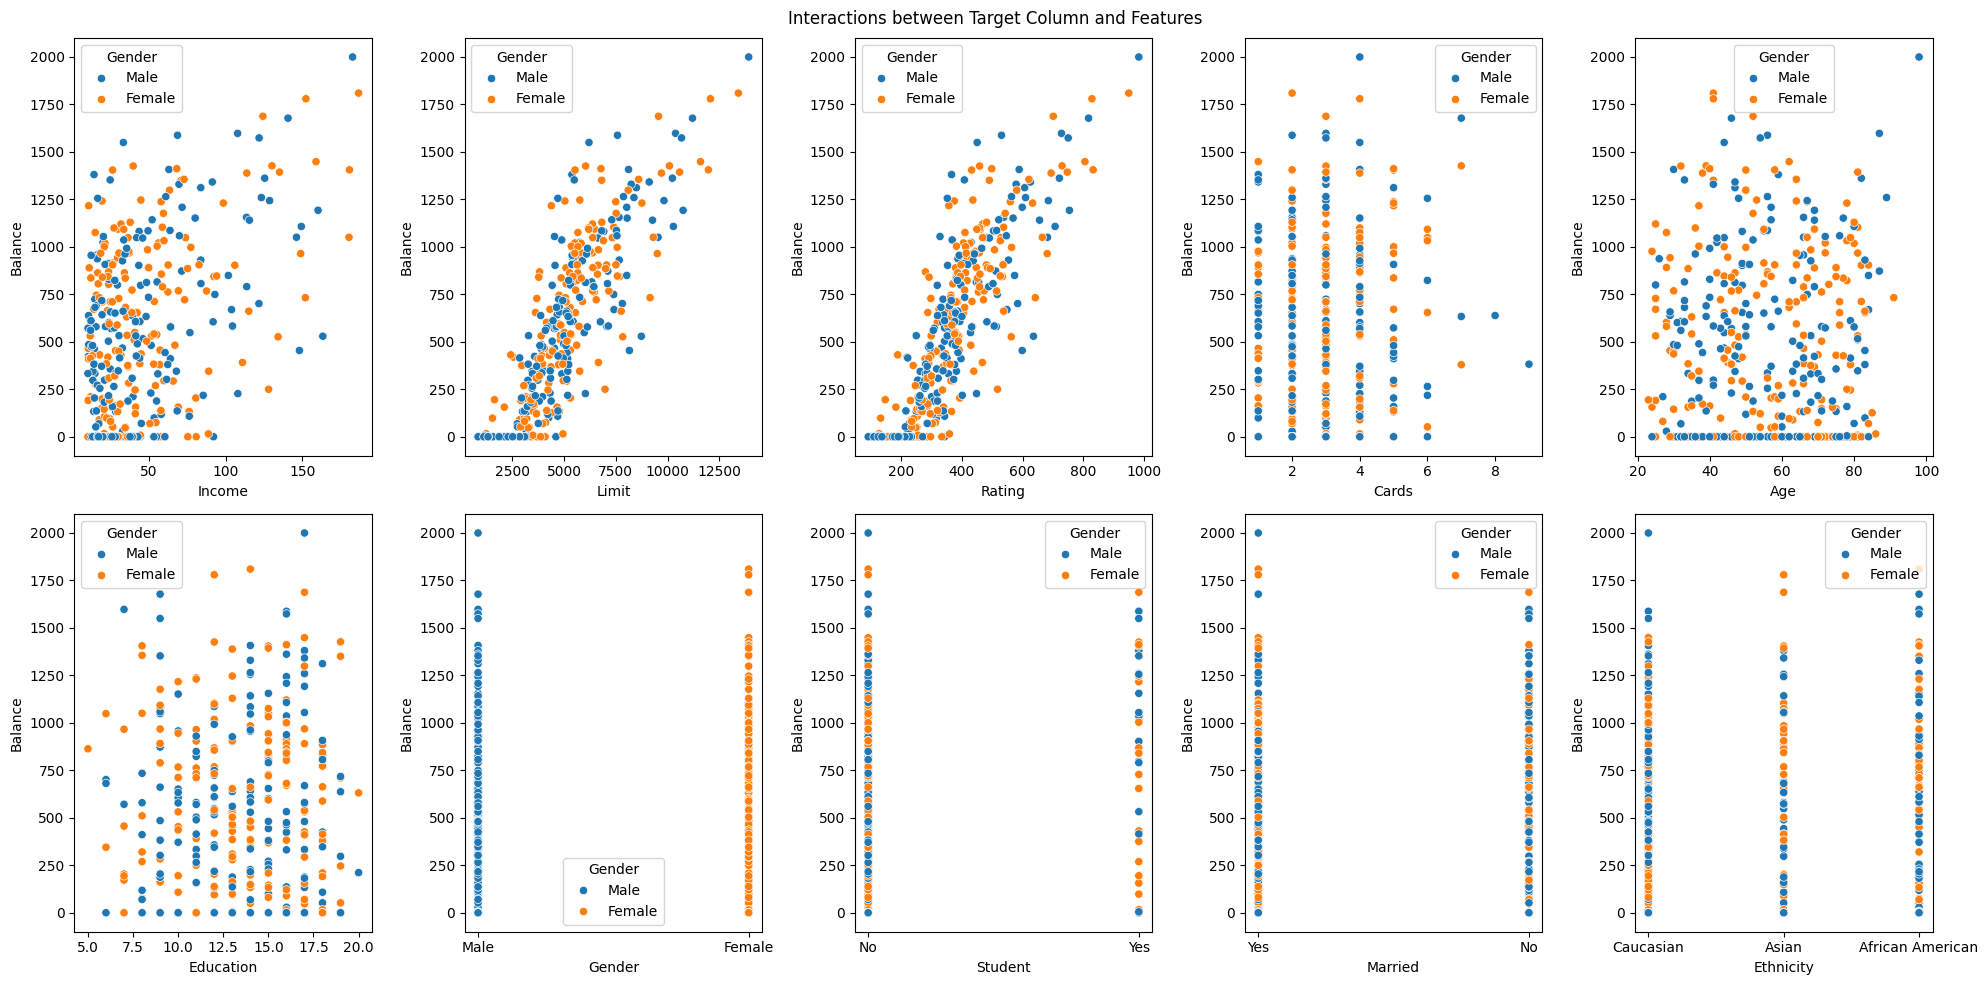

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
axes = ax.flatten()

for i, col in enumerate(data.drop('Balance', axis=1).columns):
    sns.scatterplot(data=data, x=col, y='Balance', hue='Gender', ax=axes[i])

fig.suptitle('Interactions between Target Column and Features')
plt.tight_layout()  # Adjust layout to make space for the suptitle
plt.show()


**Distribution Analysis**

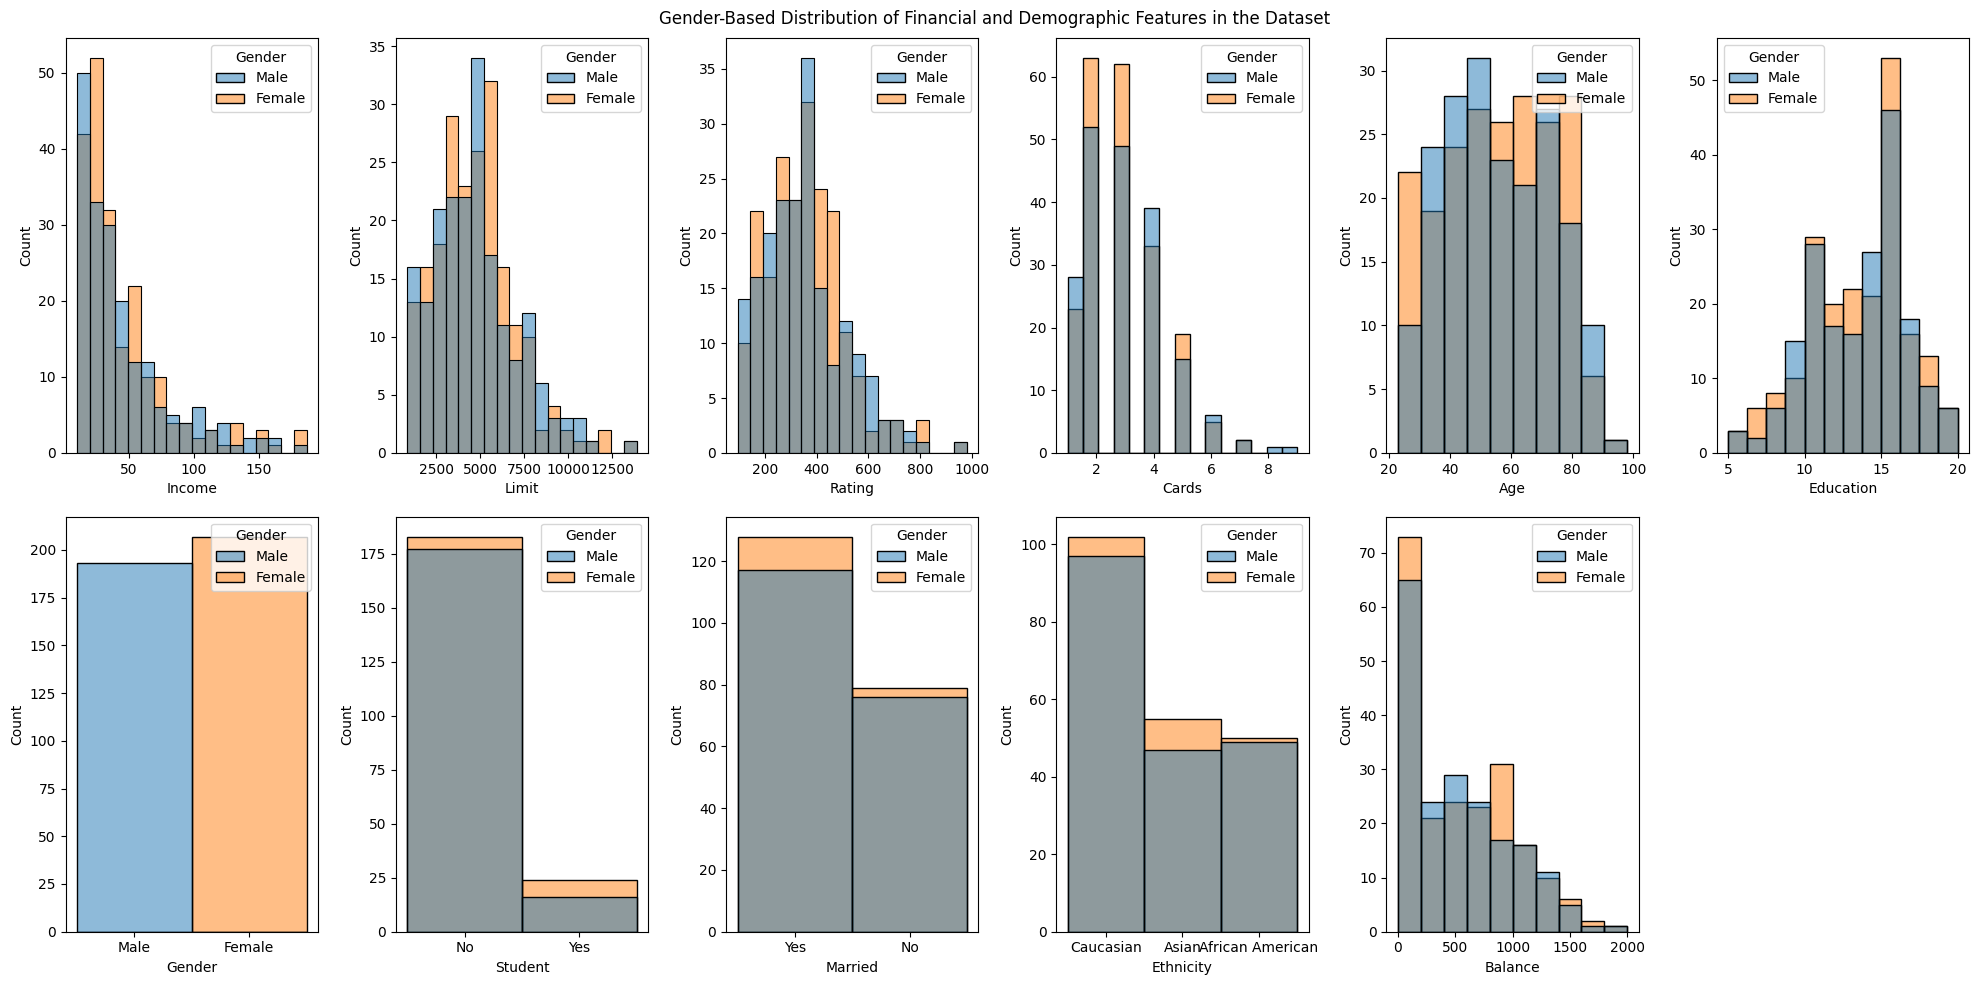

In [ ]:
fig, ax = plt.subplots(2, 6, figsize=(20, 10))
axes = ax.flatten()

for i, col in enumerate(data.columns):
    sns.histplot(data=data, x=col, hue='Gender', ax=axes[i])

fig.suptitle("Gender-Based Distribution of Financial and Demographic Features in the Dataset")
plt.tight_layout()
# Remove empty axes
for ax in axes:
    if not ax.has_data():
        fig.delaxes(ax)

plt.show()


# **Realtionships Between Variables**

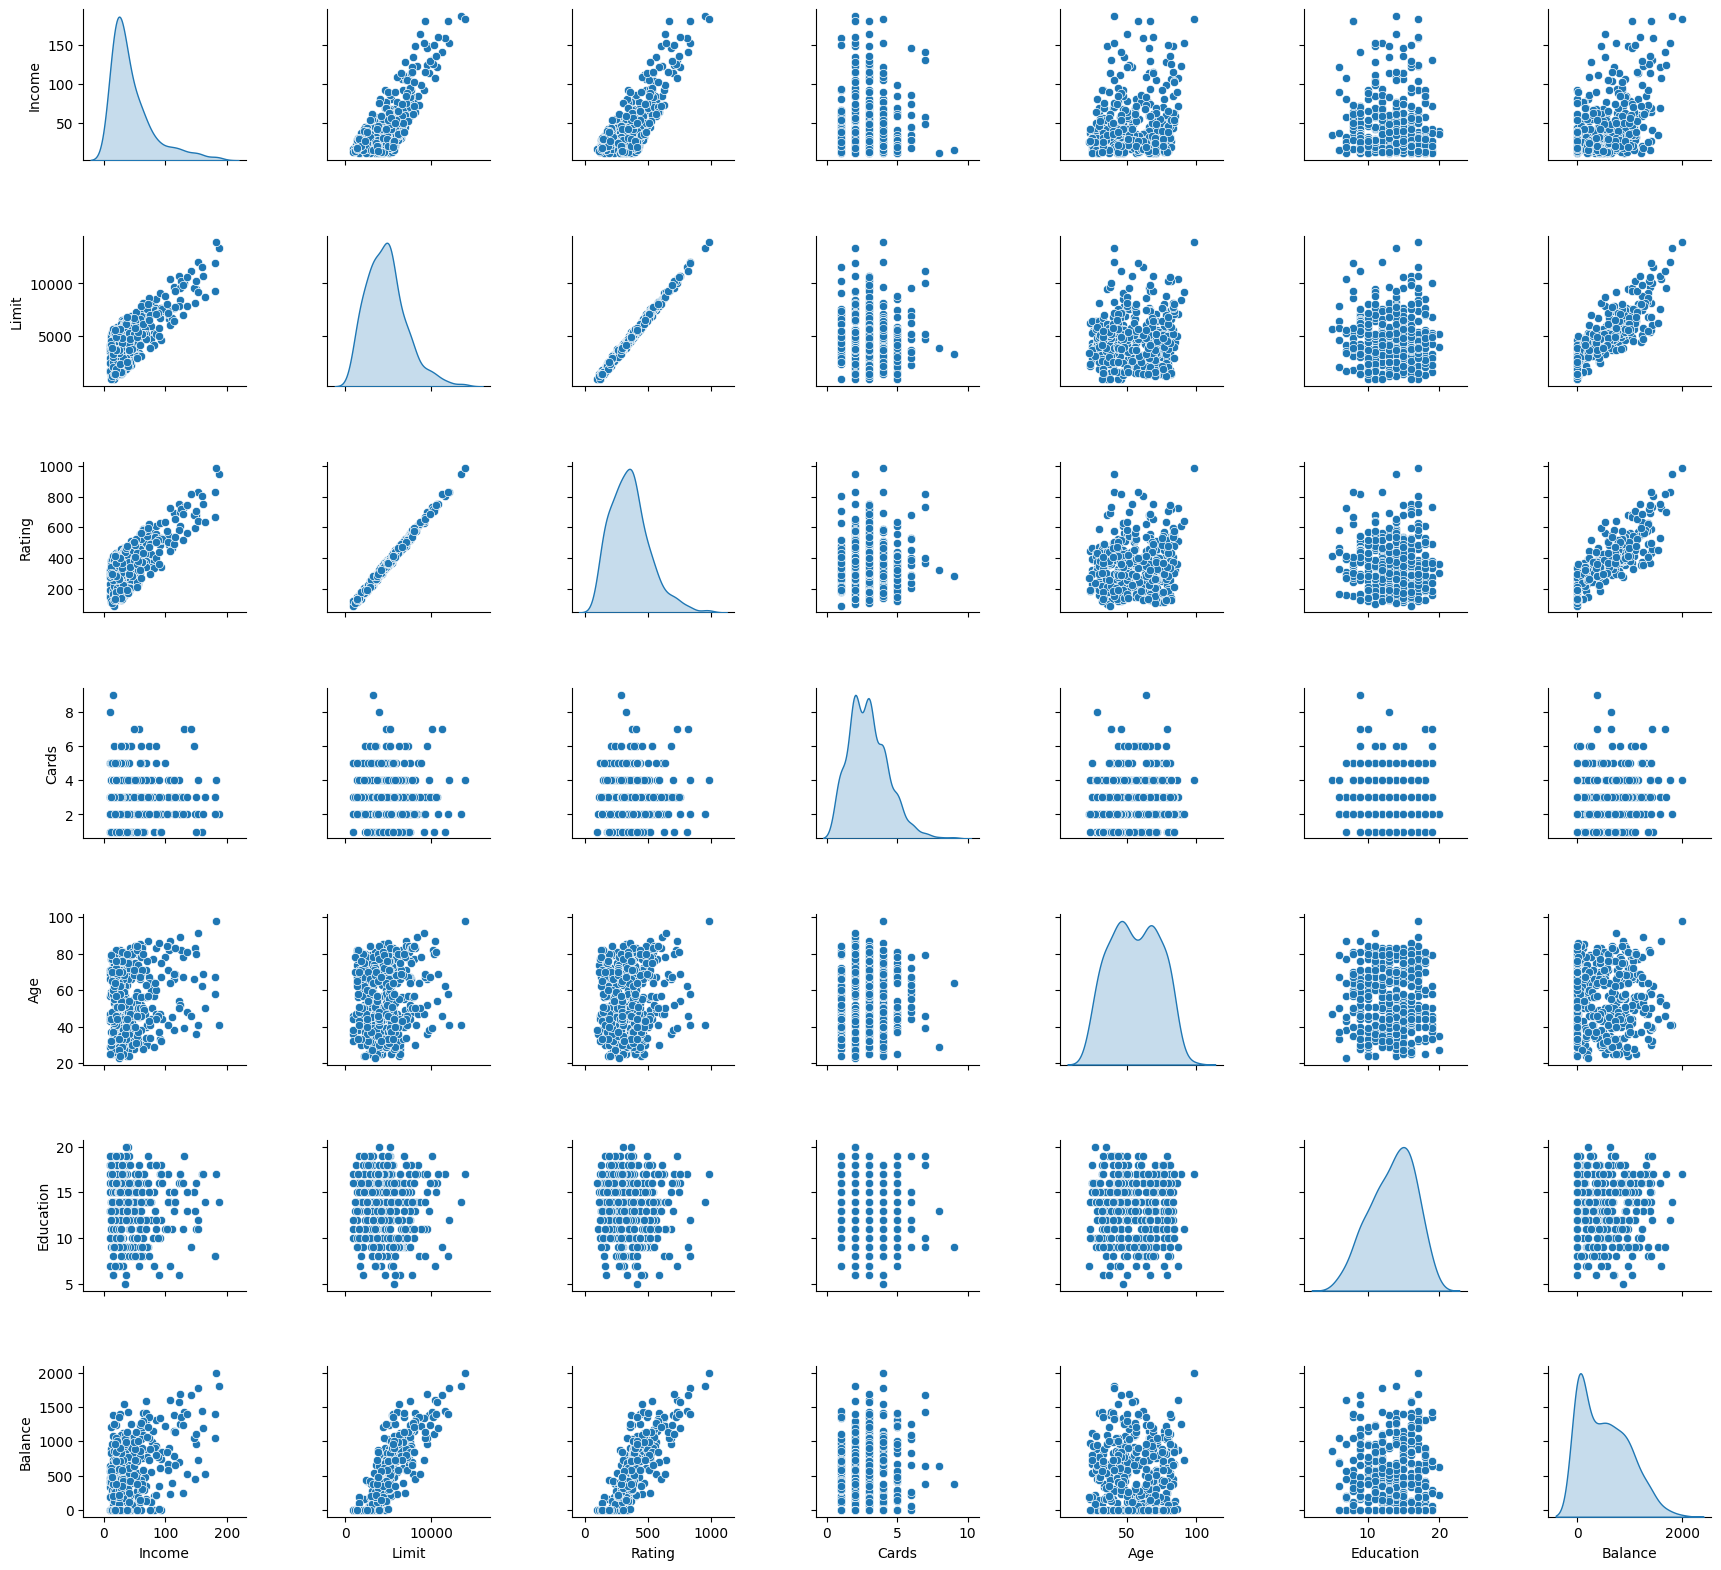

In [ ]:


# Encode remaining categorical variables
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Student'] = data['Student'].map({'Yes': 1, 'No': 0})
data['Married'] = data['Married'].map({'Yes': 1, 'No': 0})

# Select the numerical columns for pair plot
numerical_columns = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']

# Plot pair plot with adjusted figure size and spacing
sns.pairplot(data[numerical_columns], diag_kind='kde', height=2.5)
plt.subplots_adjust(top=0.9, hspace=0.5, wspace=0.5)
plt.show()


# **Features**

In [ ]:
# Create Income to Limit Ratio
data['Income_to_Limit'] = data['Income'] / data['Limit']

# Create Credit Utilization Ratio
data['Credit_Utilization'] = data['Balance'] / data['Limit']

# Create Age Group
data['Age_Group'] = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

# Create Education Level
data['Education_Level'] = pd.cut(data['Education'], bins=[0, 12, 16, 20], labels=['High School', 'Bachelors', 'Masters'])

# Display the first few rows to verify
print(data.head())

    Income  Limit  Rating  Cards  Age  Education  Gender  Student  Married  \
0   14.891   3606     283      2   34         11       1        0        1   
1  106.025   6645     483      3   82         15       0        1        1   
2  104.593   7075     514      4   71         11       1        0        0   
3  148.924   9504     681      3   36         11       0        0        0   
4   55.882   4897     357      2   68         16       1        0        1   

   Ethnicity  Balance  Income_to_Limit  Credit_Utilization Age_Group  \
0  Caucasian      333         0.004130            0.092346     30-40   
1      Asian      903         0.015956            0.135892     80-90   
2      Asian      580         0.014783            0.081979     70-80   
3      Asian      964         0.015670            0.101431     30-40   
4  Caucasian      331         0.011411            0.067592     60-70   

  Education_Level  
0     High School  
1       Bachelors  
2     High School  
3     High School 

# **Visualizing Features**

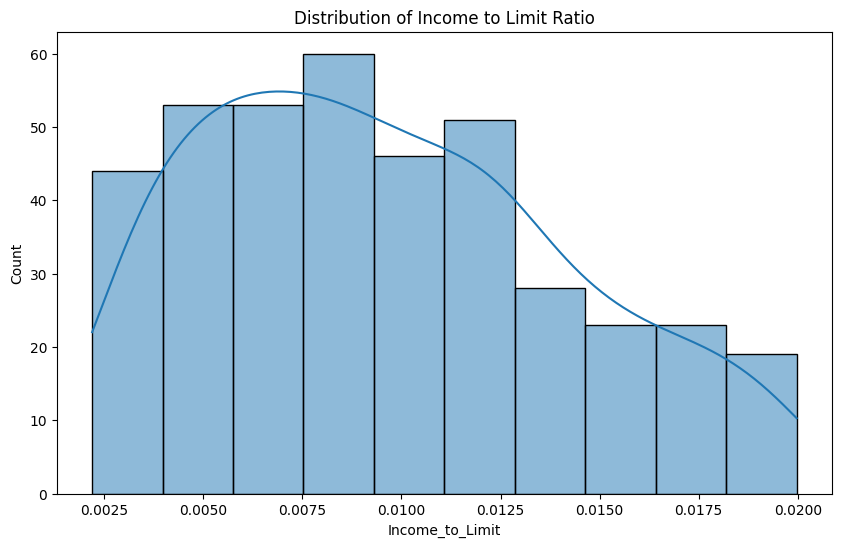

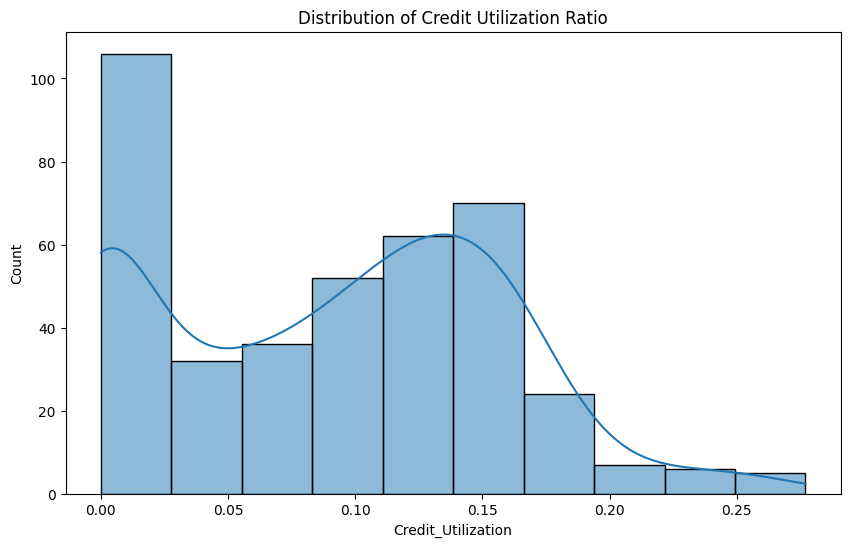

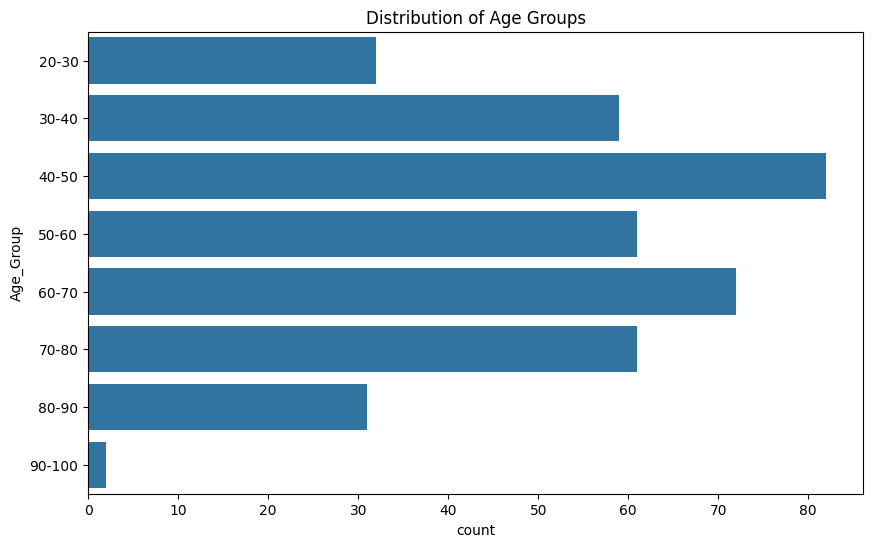

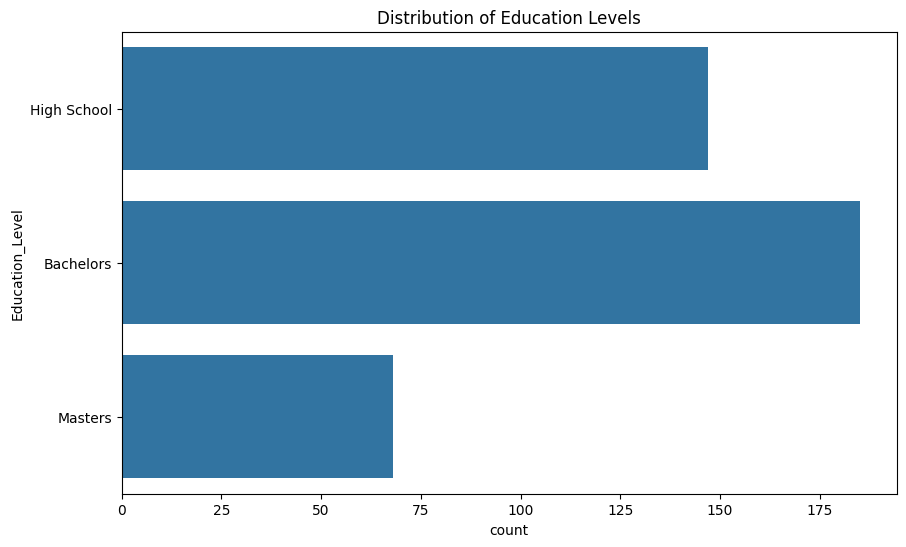

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of Income to Limit Ratio
plt.figure(figsize=(10, 6))
sns.histplot(data['Income_to_Limit'], kde=True)
plt.title('Distribution of Income to Limit Ratio')
plt.show()

# Plot the distribution of Credit Utilization Ratio
plt.figure(figsize=(10, 6))
sns.histplot(data['Credit_Utilization'], kde=True)
plt.title('Distribution of Credit Utilization Ratio')
plt.show()

# Plot the distribution of Age Groups
plt.figure(figsize=(10, 6))
sns.countplot(data['Age_Group'])
plt.title('Distribution of Age Groups')
plt.show()

# Plot the distribution of Education Levels
plt.figure(figsize=(10, 6))
sns.countplot(data['Education_Level'])
plt.title('Distribution of Education Levels')
plt.show()


# **Credit Risk Modeling**

# **Prepare data for modeling**

In [ ]:
# Drop rows with missing values in new categorical features
data.dropna(subset=['Age_Group', 'Education_Level'], inplace=True)

# Convert categorical features to dummy variables
data = pd.get_dummies(data, columns=['Age_Group', 'Education_Level'])

# Select features and target variable
features = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Balance', 'Income_to_Limit', 'Credit_Utilization'] + \
           [col for col in data.columns if 'Age_Group_' in col or 'Education_Level_' in col]
target = 'Rating'

X = data[features]
y = data[target]

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

          93       0.00      0.00      0.00         1
         103       0.00      0.00      0.00         0
         112       0.00      0.00      0.00         0
         120       0.00      0.00      0.00         0
         126       0.00      0.00      0.00         2
         137       0.00      0.00      0.00         0
         138       0.00      0.00      0.00         0
         142       0.00      0.00      0.00         1
         145       0.00      0.00      0.00         1
         147       0.00      0.00      0.00         0
         150       0.00      0.00      0.00         0
         154       0.00      0.00      0.00         1
         156       0.00      0.00      0.00         1
         162       0.00      0.00      0.00         2
         165       0.00      0.00      0.00         1
         167       0.00      0.00      0.00         0
         171       0.00      0.00      0.00         1
         173       0.00    

# **Customer Segmentation**

In [ ]:
# Select features for clustering
clustering_features = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Balance', 'Income_to_Limit', 'Credit_Utilization']

X_clustering = data[clustering_features]


# **Apply K-means clustering**

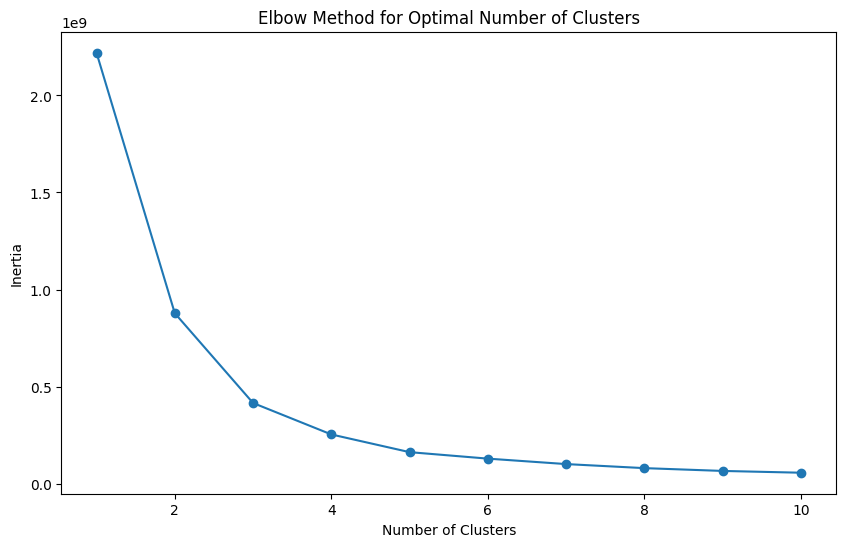

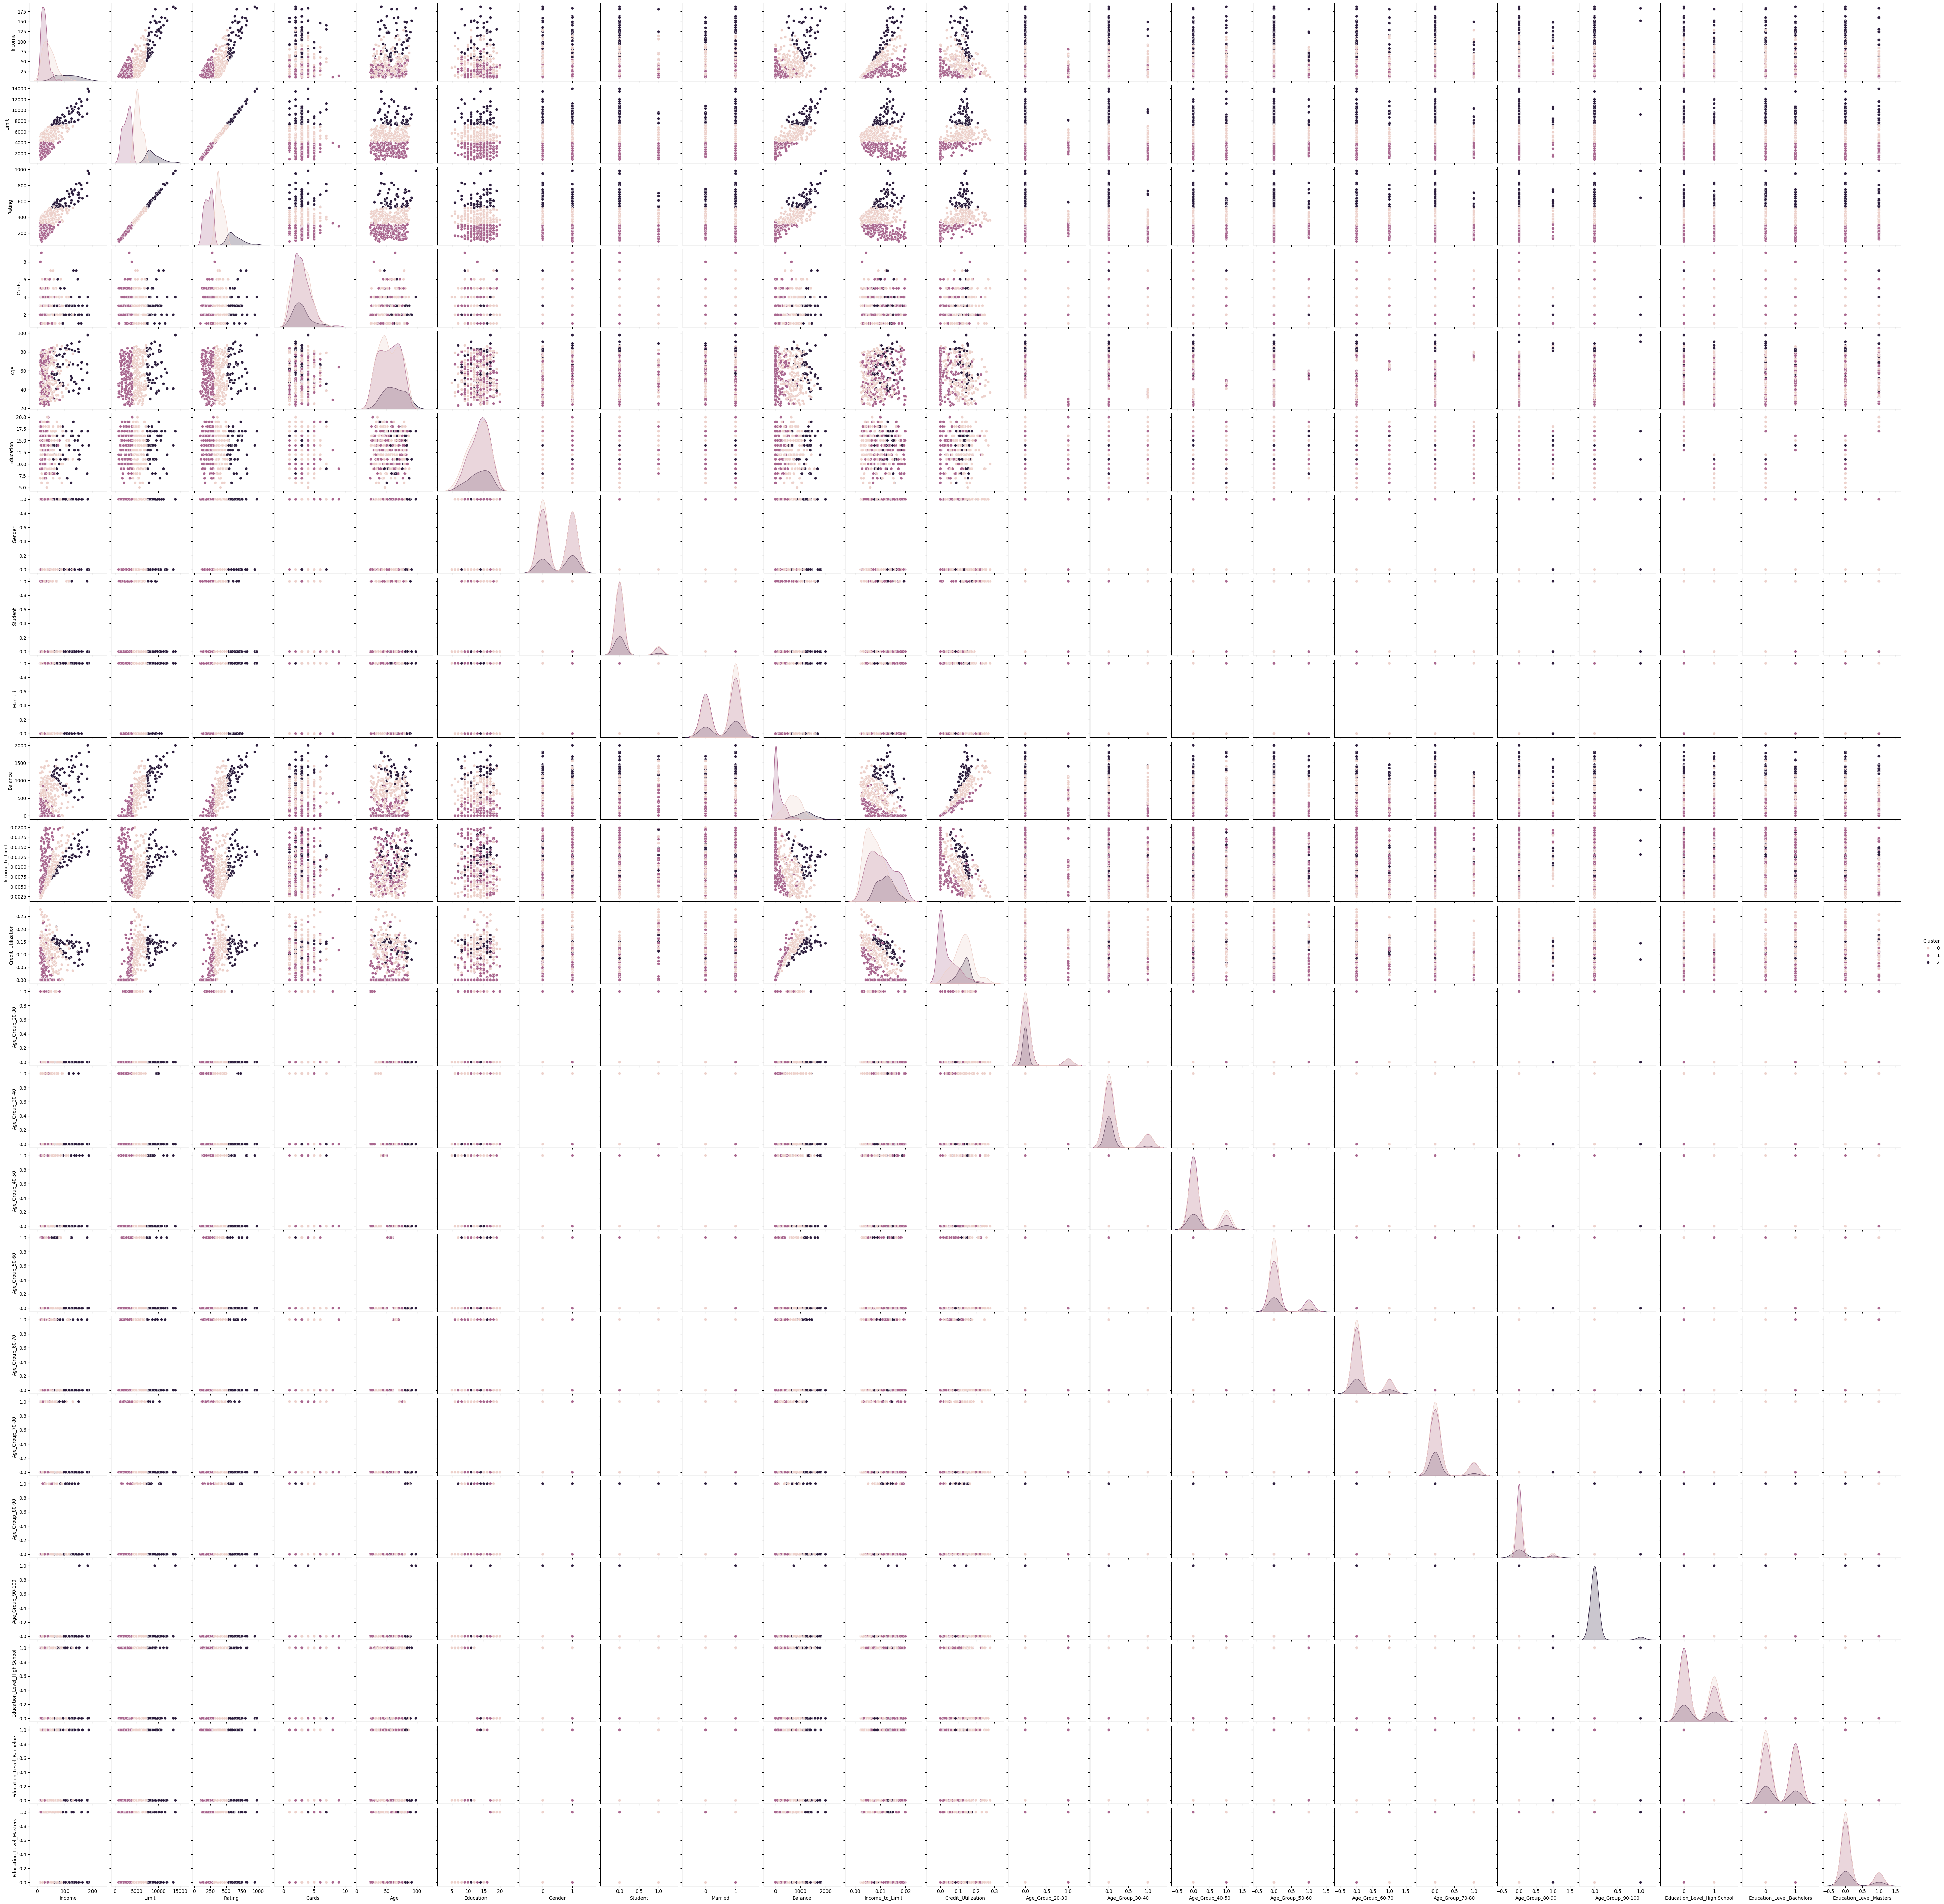

In [ ]:
from sklearn.cluster import KMeans


# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters (e.g., 3) and fit the model
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_clustering)

# Visualize the clusters
sns.pairplot(data, hue='Cluster', diag_kind='kde')
plt.show()


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluation
print("Logistic Regression Model")
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))


Logistic Regression Model
              precision    recall  f1-score   support

          93       0.00      0.00      0.00         1
         126       0.00      0.00      0.00         2
         137       0.00      0.00      0.00         0
         138       0.00      0.00      0.00         0
         142       0.00      0.00      0.00         1
         143       0.00      0.00      0.00         0
         145       0.00      0.00      0.00         1
         149       0.00      0.00      0.00         0
         154       0.00      0.00      0.00         1
         156       0.00      0.00      0.00         1
         162       0.00      0.00      0.00         2
         165       0.00      0.00      0.00         1
         167       0.00      0.00      0.00         0
         171       0.00      0.00      0.00         1
         173       0.00      0.00      0.00         1
         180       0.00      0.00      0.00         0
         182       0.00      0.00      0.00         0
 

# **Plotty Dashboard**

In [ ]:
# Initialize the Dash app
app = dash.Dash(__name__)
app.title = "Credit Qualification Dashboard"

# Apply dark theme
app.css.append_css({"external_url": "https://codepen.io/chriddyp/pen/bWLwgP.css"})

# Layout of the app
app.layout = html.Div(style={'backgroundColor': '#303030', 'color': '#FFFFFF', 'padding': '20px'}, children=[
    html.H1("Credit Qualification Dashboard", style={'textAlign': 'center', 'color': '#FFFFFF'}),
    html.Div([
        html.Div([
            html.Label("Income", style={'color': '#FFFFFF'}),
            dcc.Input(id='input-income', type='number', value=50, style={'margin-bottom': '10px'}),
            html.Label("Limit", style={'color': '#FFFFFF'}),
            dcc.Input(id='input-limit', type='number', value=5000, style={'margin-bottom': '10px'}),
            html.Label("Rating", style={'color': '#FFFFFF'}),
            dcc.Input(id='input-rating', type='number', value=300, style={'margin-bottom': '10px'}),
            html.Label("Cards", style={'color': '#FFFFFF'}),
            dcc.Input(id='input-cards', type='number', value=2, style={'margin-bottom': '10px'}),
        ], style={'display': 'inline-block', 'width': '48%', 'verticalAlign': 'top'}),
        html.Div([
            html.Label("Age", style={'color': '#FFFFFF'}),
            dcc.Input(id='input-age', type='number', value=30, style={'margin-bottom': '10px'}),
            html.Label("Education", style={'color': '#FFFFFF'}),
            dcc.Input(id='input-education', type='number', value=15, style={'margin-bottom': '10px'}),
            html.Label("Gender", style={'color': '#FFFFFF'}),
            dcc.Dropdown(id='input-gender', options=[
                {'label': 'Male', 'value': 1},
                {'label': 'Female', 'value': 0}
            ], value=1, style={'margin-bottom': '10px'}),
            html.Label("Student", style={'color': '#FFFFFF'}),
            dcc.Dropdown(id='input-student', options=[
                {'label': 'Yes', 'value': 1},
                {'label': 'No', 'value': 0}
            ], value=0, style={'margin-bottom': '10px'}),
            html.Label("Married", style={'color': '#FFFFFF'}),
            dcc.Dropdown(id='input-married', options=[
                {'label': 'Yes', 'value': 1},
                {'label': 'No', 'value': 0}
            ], value=1, style={'margin-bottom': '10px'}),
            html.Label("Balance", style={'color': '#FFFFFF'}),
            dcc.Input(id='input-balance', type='number', value=1000, style={'margin-bottom': '10px'}),
        ], style={'display': 'inline-block', 'width': '48%', 'verticalAlign': 'top', 'marginLeft': '4%'}),
    ]),
    html.Button('Submit', id='submit-button', n_clicks=0, style={'margin-top': '10px', 'backgroundColor': '#4CAF50', 'color': 'white'}),
    html.Div(id='prediction-output', style={'margin-top': '20px', 'fontSize': 24, 'fontWeight': 'bold', 'color': '#FFFFFF'}),
])

# Callback to update prediction
@app.callback(
    Output('prediction-output', 'children'),
    [Input('submit-button', 'n_clicks')],
    [Input('input-income', 'value'),
     Input('input-limit', 'value'),
     Input('input-rating', 'value'),
     Input('input-cards', 'value'),
     Input('input-age', 'value'),
     Input('input-education', 'value'),
     Input('input-gender', 'value'),
     Input('input-student', 'value'),
     Input('input-married', 'value'),
     Input('input-balance', 'value')]
)
def update_prediction(n_clicks, income, limit, rating, cards, age, education, gender, student, married, balance):
    # Ensure all inputs are provided
    if None in [income, limit, rating, cards, age, education, gender, student, married, balance]:
        return "Please fill in all the fields."

    try:
        # Create input data for prediction
        input_data = np.array([[income, limit, rating, cards, age, education, gender, student, married, balance]])

        # Normalize and add additional features if needed
        input_df = pd.DataFrame(input_data, columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Balance'])
        input_df['Income_to_Limit'] = input_df['Income'] / input_df['Limit']
        input_df['Credit_Utilization'] = input_df['Balance'] / input_df['Limit']

        # Add dummy variables for Age_Group and Education_Level
        age_group = pd.cut([age], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
        education_level = pd.cut([education], bins=[0, 12, 16, 20], labels=['High School', 'Bachelors', 'Masters'])
        input_df['Age_Group'] = age_group
        input_df['Education_Level'] = education_level
        input_df = pd.get_dummies(input_df, columns=['Age_Group', 'Education_Level'])

        # Ensure all dummy columns are present
        for col in [col for col in X.columns if col.startswith('Age_Group_') or col.startswith('Education_Level_')]:
            if col not in input_df.columns:
                input_df[col] = 0

        # Reorder columns to match training data
        input_df = input_df[X.columns]

        # Make prediction using the trained model (assuming logistic_model is trained)
        prediction = logistic_model.predict(input_df)[0]

        # Return the result
        if prediction == 1:
            return "This person qualifies for credit."
        else:
            return "This person does not qualify for credit."
    except Exception as e:
        return f"Error in prediction: {str(e)}"

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
# Initialize the Dash app
app = dash.Dash(__name__)
app.title = "Credit Qualification Dashboard"

# Apply dark theme
app.css.append_css({"external_url": "https://codepen.io/chriddyp/pen/bWLwgP.css"})

# Layout of the app
app.layout = html.Div(style={'backgroundColor': '#303030', 'color': '#FFFFFF', 'padding': '20px'}, children=[
    html.H1("Credit Qualification Dashboard", style={'textAlign': 'center', 'color': '#FFFFFF'}),
    html.Div([
        html.Div([
            html.Label("Income", style={'color': '#FFFFFF'}),
            dcc.Input(id='input-income', type='number', value=50, style={'margin-bottom': '10px'}),
            html.Label("Limit", style={'color': '#FFFFFF'}),
            dcc.Input(id='input-limit', type='number', value=5000, style={'margin-bottom': '10px'}),
            html.Label("Rating", style={'color': '#FFFFFF'}),
            dcc.Input(id='input-rating', type='number', value=300, style={'margin-bottom': '10px'}),
            html.Label("Cards", style={'color': '#FFFFFF'}),
            dcc.Input(id='input-cards', type='number', value=2, style={'margin-bottom': '10px'}),
        ], style={'display': 'inline-block', 'width': '48%', 'verticalAlign': 'top'}),
        html.Div([
            html.Label("Age", style={'color': '#FFFFFF'}),
            dcc.Input(id='input-age', type='number', value=30, style={'margin-bottom': '10px'}),
            html.Label("Education", style={'color': '#FFFFFF'}),
            dcc.Input(id='input-education', type='number', value=15, style={'margin-bottom': '10px'}),
            html.Label("Balance", style={'color': '#FFFFFF'}),
            dcc.Input(id='input-balance', type='number', value=1000, style={'margin-bottom': '10px'}),
            html.Label("Gender", style={'color': '#FFFFFF'}),
            dcc.Dropdown(id='input-gender', options=[
                {'label': 'Male', 'value': 1},
                {'label': 'Female', 'value': 0}
            ], value=1, style={'color': '#000000', 'margin-bottom': '10px'}),
            html.Label("Student", style={'color': '#FFFFFF'}),
            dcc.Dropdown(id='input-student', options=[
                {'label': 'Yes', 'value': 1},
                {'label': 'No', 'value': 0}
            ], value=0, style={'color': '#000000', 'margin-bottom': '10px'}),
            html.Label("Married", style={'color': '#FFFFFF'}),
            dcc.Dropdown(id='input-married', options=[
                {'label': 'Yes', 'value': 1},
                {'label': 'No', 'value': 0}
            ], value=1, style={'color': '#000000', 'margin-bottom': '10px'}),
        ], style={'display': 'inline-block', 'width': '48%', 'verticalAlign': 'top', 'marginLeft': '4%'}),
    ]),
    html.Button('Randomize Fill', id='random-fill-button', n_clicks=0, style={'margin-top': '10px', 'backgroundColor': '#2196F3', 'color': 'white'}),
    html.Button('Submit', id='submit-button', n_clicks=0, style={'margin-top': '10px', 'margin-left': '10px', 'backgroundColor': '#4CAF50', 'color': 'white'}),
    html.Div(id='prediction-output', style={'margin-top': '20px', 'fontSize': 24, 'fontWeight': 'bold', 'color': '#FFFFFF'}),
])

# Callback to randomly fill the input fields
@app.callback(
    [Output('input-income', 'value'),
     Output('input-limit', 'value'),
     Output('input-rating', 'value'),
     Output('input-cards', 'value'),
     Output('input-age', 'value'),
     Output('input-education', 'value'),
     Output('input-gender', 'value'),
     Output('input-student', 'value'),
     Output('input-married', 'value'),
     Output('input-balance', 'value')],
    [Input('random-fill-button', 'n_clicks')]
)
def random_fill_inputs(n_clicks):
    np.random.seed(n_clicks)  # Seed for reproducibility in testing
    random_data = {
        'income': np.random.randint(10, 200),
        'limit': np.random.randint(1000, 20000),
        'rating': np.random.randint(100, 800),
        'cards': np.random.randint(1, 10),
        'age': np.random.randint(20, 90),
        'education': np.random.randint(5, 21),
        'gender': np.random.choice([1, 0]),
        'student': np.random.choice([1, 0]),
        'married': np.random.choice([1, 0]),
        'balance': np.random.randint(0, 20000)
    }
    return (random_data['income'], random_data['limit'], random_data['rating'],
            random_data['cards'], random_data['age'], random_data['education'],
            random_data['gender'], random_data['student'], random_data['married'],
            random_data['balance'])

# Callback to update prediction
@app.callback(
    Output('prediction-output', 'children'),
    [Input('submit-button', 'n_clicks')],
    [State('input-income', 'value'),
     State('input-limit', 'value'),
     State('input-rating', 'value'),
     State('input-cards', 'value'),
     State('input-age', 'value'),
     State('input-education', 'value'),

     State('input-gender', 'value'),
     State('input-student', 'value'),
     State('input-married', 'value'),
     State('input-balance', 'value')]
)
def update_prediction(n_clicks, income, limit, rating, cards, age, education, gender, student, married, balance):
    # Ensure all inputs are provided
    if None in [income, limit, rating, cards, age, education, gender, student, married, balance]:
        return "Please fill in all the fields."

    try:
        # Create input data for prediction
        input_data = np.array([[income, limit, rating, cards, age, education, gender, student, married, balance]])

        # Normalize and add additional features if needed
        input_df = pd.DataFrame(input_data, columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Balance'])
        input_df['Income_to_Limit'] = input_df['Income'] / input_df['Limit']
        input_df['Credit_Utilization'] = input_df['Balance'] / input_df['Limit']

        # Add dummy variables for Age_Group and Education_Level
        age_group = pd.cut([age], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
        education_level = pd.cut([education], bins=[0, 12, 16, 20], labels=['High School', 'Bachelors', 'Masters'])
        input_df['Age_Group'] = age_group
        input_df['Education_Level'] = education_level
        input_df = pd.get_dummies(input_df, columns=['Age_Group', 'Education_Level'])

        # Ensure all dummy columns are present
        for col in [col for col in X.columns if col.startswith('Age_Group_') or col.startswith('Education_Level_')]:
            if col not in input_df.columns:
                input_df[col] = 0

        # Reorder columns to match training data
        input_df = input_df[X.columns]

        # Make prediction using the trained model (assuming logistic_model is trained)
        prediction = logistic_model.predict(input_df)[0]

        # Return the result
        if prediction == 1:
            return "This person qualifies for credit."
        else:
            return "This person does not qualify for credit."
    except Exception as e:
        return f"Error in prediction: {str(e)}"

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>